# Story prediction

#### For story generation, various short stories were taken from the web for training purposes.

## Importing libraries

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 
import tensorflow as tf
import pickle

## Analyzing dataset

In [0]:
data=open('stories.txt',encoding="utf8").read()

In [3]:
data

'Frozen grass crunched beneath the steps of a shambling man. His shoes were crusted and worn, and dirty toes protruded from holes in the sides. His quivering eye scanned the surroundings: a freshly paved path through the grass, which led to a double swingset, and a picnic table off to the side with a group of parents lounging in bundles, huddled to keep warm. Squeaky clean-and-combed children giggled and bounced as they weaved through the pathways with their hot breaths escaping into the air like smoke.\nOne boy clutched an ocean-blue rectangular box, which had a shooting star etched in the side. He unlatched the tin, and a plethora of snacks tumbled out. The ragged man cast his gaze upon the contents like a magnet, groping his midsection furiously. His face was ghastly, with a horrid expression that pierced the atmosphere like a spear. He stuck out like a sore thumb, and it didn’t take longer than a few moments for the loungers to catch a glimpse of this unsightly intruder.\nThe boy s

## NLP

In [0]:
# Converting the text to lowercase and splitting it
corpus = data.lower().split("\n")

In [5]:
corpus

['frozen grass crunched beneath the steps of a shambling man. his shoes were crusted and worn, and dirty toes protruded from holes in the sides. his quivering eye scanned the surroundings: a freshly paved path through the grass, which led to a double swingset, and a picnic table off to the side with a group of parents lounging in bundles, huddled to keep warm. squeaky clean-and-combed children giggled and bounced as they weaved through the pathways with their hot breaths escaping into the air like smoke.',
 'one boy clutched an ocean-blue rectangular box, which had a shooting star etched in the side. he unlatched the tin, and a plethora of snacks tumbled out. the ragged man cast his gaze upon the contents like a magnet, groping his midsection furiously. his face was ghastly, with a horrid expression that pierced the atmosphere like a spear. he stuck out like a sore thumb, and it didn’t take longer than a few moments for the loungers to catch a glimpse of this unsightly intruder.',
 'th

In [6]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(total_words)

2302


In [0]:
pickle.dump(tokenizer,open('transform.pkl','wb'))

In [0]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [8]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
print(max_sequence_len)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

448


In [0]:
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

In [0]:
label = ku.to_categorical(label, num_classes=total_words)

## Model building

In [11]:
model = Sequential()
model.add(Embedding(total_words, 300, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(200, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 447, 300)          690600    
_________________________________________________________________
bidirectional (Bidirectional (None, 447, 400)          801600    
_________________________________________________________________
dropout (Dropout)            (None, 447, 400)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               200400    
_________________________________________________________________
dense (Dense)                (None, 1151)              116251    
_________________________________________________________________
dense_1 (Dense)              (None, 2302)              2651904   
Total params: 4,460,755
Trainable params: 4,460,755
Non-trainable params: 0
______________________________________________

In [0]:
history = model.fit(predictors, label, epochs=200, verbose=0)

## Graphs

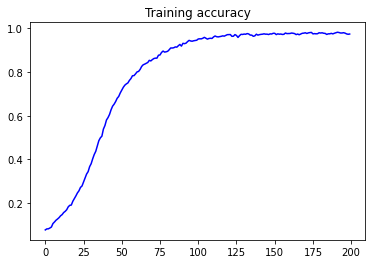

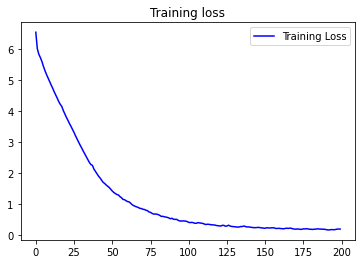

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

## Saving the model

In [14]:
model.save('model_final.h5')
print("Saved model to disk")

Saved model to disk


In [0]:
# serialize model to JSON
model_json=model.to_json()
with open("model.json","w") as json_file:
  json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
!pip install pickle-mixin

  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=6002 sha256=a73f463a424d7a9b0957317a0e5f86e0c7ec99f1cc5149838732f0d9bc1c15bc
  Stored in directory: c:\users\jayashree\appdata\local\pip\cache\wheels\d0\70\0b\673e09a7ed429660d22352a1b117b4f616a8fc054bdd7eb157
Successfully built pickle-mixin


In [0]:
weigh= loaded_model.get_weights(); 
pklfile= "model.pkl"
fpkl= open(pklfile, 'wb')    #Python 3     
pickle.dump(weigh, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
fpkl.close()

## Loading the trained model (if required)

In [0]:
#!pip install h5py

In [0]:
# Load json and create model
json_file=open('model.json','r')
loaded_model_json=json_file.read()
json_file.close()
loaded_model=tf.keras.models.model_from_json(loaded_model_json)

# Load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [0]:
#loaded_model.summary()

## Prediction

In [16]:
seed_text = "As i walked, my heart sank"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
As i walked, my heart sank until he was alarmed by the voice of the hunter and realised what could have happened with him he flew away the boy crunched before it disguised herself as another effort to pull out the bush which he did the next was a small tree which the child had to struggle a lot to pull out finally the old man showed him a bigger tree and asked the child to pull it out the boy did so with ease and they walked on the morning she was asked how she had slept as a while they came back with me
